ASSIGNMENT ON DATA PROCESSING AND FEATURE ENGINEERING

 Loading required Libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Load the dataset and display first five rows, further summarizing the dataset using descriptive statistics

In [126]:
#Loading the dataset in pandas dataframe
df = pd.read_csv('electrical_dataset.csv')

In [127]:
#Displaying first five rows
df.head()

,Timestamp,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%)
0,2024-12-01 00:00:00,222.483571,4.642510,965.023943,0.880626,21.734855,45.494834
1,2024-12-01 00:01:00,219.308678,4.206038,894.158159,0.939144,NaN,46.477508
2,2024-12-01 00:02:00,223.238443,4.143615,NaN,0.864156,17.952615,64.195316
3,2024-12-01 00:03:00,227.615149,4.188552,1006.917263,0.926711,19.613098,37.214868
4,2024-12-01 00:04:00,NaN,5.165739,1081.262142,0.931754,21.783244,55.741660


In [128]:
#Summarizing the dataset
df.describe()

,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%)
count,9500.000000,9600.000000,9700.000000,9800.000000,9700.000000,9600.000000
mean,219.992912,5.014070,1102.598216,0.919970,20.003119,50.003748
std,5.007974,0.579586,143.312091,0.040413,7.363127,11.547591
min,200.387999,4.000096,747.956441,0.850001,3.005629,30.000337
25%,216.654181,4.514213,989.925889,0.885059,13.225365,40.117437
50%,219.997444,5.020268,1100.829462,0.920172,20.011891,49.917048
75%,223.348834,5.515116,1207.908605,0.954773,26.657589,60.105216
max,239.631189,5.999850,1498.874098,0.989985,36.151952,69.997588


2. Identify columns of missing values and calculating percentage of missing values for each column, further imputing the missing values.

In [129]:
#Identifying Columns with missing values
df.isnull().sum()

Timestamp             0
Voltage (V)         500
Current (I)         400
Power (W)           300
Power_Factor        200
Temperature (°C)    300
Humidity (%)        400
dtype: int64

In [130]:
#Percentage of Missing Values of each column
(df.isnull().sum()/len(df))*100

Timestamp           0.0
Voltage (V)         5.0
Current (I)         4.0
Power (W)           3.0
Power_Factor        2.0
Temperature (°C)    3.0
Humidity (%)        4.0
dtype: float64

In [131]:
#Imputing the missing Values
df.ffill()

#I have used Forward fill here because the percentage of missing values is very less as compared to the amount of data and the data in each column is also somewhat similar to each other so filling the missing columns with previous data seems the best.

,Timestamp,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%)
0,2024-12-01 00:00:00,222.483571,4.642510,965.023943,0.880626,21.734855,45.494834
1,2024-12-01 00:01:00,219.308678,4.206038,894.158159,0.939144,21.734855,46.477508
2,2024-12-01 00:02:00,223.238443,4.143615,894.158159,0.864156,17.952615,64.195316
3,2024-12-01 00:03:00,227.615149,4.188552,1006.917263,0.926711,19.613098,37.214868
4,2024-12-01 00:04:00,227.615149,5.165739,1081.262142,0.931754,21.783244,55.741660
...,...,...,...,...,...,...,...
9995,2024-12-07 22:35:00,226.505510,5.365876,1186.219693,0.858940,20.553140,65.807219
9996,2024-12-07 22:36:00,226.505510,5.699823,1219.255942,0.890498,18.586842,35.774593
9997,2024-12-07 22:37:00,216.473416,4.431447,992.233503,0.974504,20.791749,61.015434
9998,2024-12-07 22:38:00,222.478828,5.507653,1260.912502,0.883132,19.020961,61.015434


3. Filling

In [132]:
# Step 1: Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

# Step 2: Fill missing values in numerical columns with mean or median
# We will use mean for numerical columns here
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Step 3: Fill missing values in categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#Used mean for numerical columns as values were not very stretched apart thus mean would give a better avg value.

4. Detecting outliers in voltage and power column using IQR method

In [133]:
#Calculating Outliers for the column Voltage

# Calculate Q1, Q3, and IQR
Q1 = df['Voltage (V)'].quantile(0.25)
Q3 = df['Voltage (V)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Voltage (V)'] < lower_bound) | (df['Voltage (V)'] > upper_bound)]
print(outliers)

                Timestamp  Voltage (V)  Current (I)    Power (W)  \
74    2024-12-01 01:14:00   206.901274     5.014070  1063.302317   
179   2024-12-01 02:59:00   233.600846     5.768140  1265.192873   
209   2024-12-01 03:29:00   239.263657     5.332611  1325.738027   
262   2024-12-01 04:22:00   203.793663     4.904204  1032.586025   
478   2024-12-01 07:58:00   235.394404     5.888664  1309.026006   
...                   ...          ...          ...          ...   
9285  2024-12-07 10:45:00   207.391976     5.815520  1281.353283   
9573  2024-12-07 15:33:00   206.273502     4.553130   934.529383   
9606  2024-12-07 16:06:00   205.990442     5.863167  1102.598216   
9692  2024-12-07 17:32:00   232.651848     5.170661  1309.840735   
9770  2024-12-07 18:50:00   200.387999     4.604343  1006.444522   

      Power_Factor  Temperature (°C)  Humidity (%)  
74        0.977938         22.153156     61.053240  
179       0.948982         24.893645     49.810285  
209       0.869527      

In [134]:
#Calculating Outliers for the column Power (W)

# Calculate Q1, Q3, and IQR
Q2 = df['Power (W)'].quantile(0.25)
Q4 = df['Power (W)'].quantile(0.75)
IQR = Q4 - Q2

# Define bounds
lower_bound = Q2 - 1.5 * IQR
upper_bound = Q4 + 1.5 * IQR

# Identify outliers
outlier = df[(df['Power (W)'] < lower_bound) | (df['Power (W)'] > upper_bound)]
print(outlier)

Empty DataFrame
Columns: [Timestamp, Voltage (V), Current (I), Power (W), Power_Factor, Temperature (°C), Humidity (%)]
Index: []


In [135]:
outliers.count()

Timestamp           127
Voltage (V)         127
Current (I)         127
Power (W)           127
Power_Factor        127
Temperature (°C)    127
Humidity (%)        127
dtype: int64

5. Normalize...

In [136]:
# Min-Max Scaling
df['Column_scaled'] = (df['Power (W)'] - df['Power (W)'].min()) / (df['Power (W)'].max() - df['Power (W)'].min())
print(df)
#transformed data is between 0 and 1

                Timestamp  Voltage (V)  Current (I)    Power (W)  \
0     2024-12-01 00:00:00   222.483571     4.642510   965.023943   
1     2024-12-01 00:01:00   219.308678     4.206038   894.158159   
2     2024-12-01 00:02:00   223.238443     4.143615  1102.598216   
3     2024-12-01 00:03:00   227.615149     4.188552  1006.917263   
4     2024-12-01 00:04:00   219.992912     5.165739  1081.262142   
...                   ...          ...          ...          ...   
9995  2024-12-07 22:35:00   226.505510     5.365876  1186.219693   
9996  2024-12-07 22:36:00   219.992912     5.699823  1219.255942   
9997  2024-12-07 22:37:00   216.473416     4.431447   992.233503   
9998  2024-12-07 22:38:00   222.478828     5.507653  1260.912502   
9999  2024-12-07 22:39:00   223.221942     5.014070  1379.821738   

      Power_Factor  Temperature (°C)  Humidity (%)  Column_scaled  
0         0.880626         21.734855     45.494834       0.289070  
1         0.939144         20.003119     46.477

6.New Feature 'Shift'

In [137]:
# Step 1: Convert the Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Step 2: Define the 'Shift' column based on the hour of the Timestamp
def assign_shift(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['Shift'] = df['Timestamp'].dt.hour.apply(assign_shift)

# Step 3: Group by 'Shift' and calculate the average Power (W) and Temperature (C)
shift_grouped = df.groupby('Shift')[['Power (W)', 'Temperature (°C)']].mean()

7. New Feature 'Energy_Efficiency'

In [138]:
df['Energy_Efficiency'] = df['Power (W)'] * df['Power_Factor']
print(df)

               Timestamp  Voltage (V)  Current (I)    Power (W)  Power_Factor  \
0    2024-12-01 00:00:00   222.483571     4.642510   965.023943      0.880626   
1    2024-12-01 00:01:00   219.308678     4.206038   894.158159      0.939144   
2    2024-12-01 00:02:00   223.238443     4.143615  1102.598216      0.864156   
3    2024-12-01 00:03:00   227.615149     4.188552  1006.917263      0.926711   
4    2024-12-01 00:04:00   219.992912     5.165739  1081.262142      0.931754   
...                  ...          ...          ...          ...           ...   
9995 2024-12-07 22:35:00   226.505510     5.365876  1186.219693      0.858940   
9996 2024-12-07 22:36:00   219.992912     5.699823  1219.255942      0.890498   
9997 2024-12-07 22:37:00   216.473416     4.431447   992.233503      0.974504   
9998 2024-12-07 22:38:00   222.478828     5.507653  1260.912502      0.883132   
9999 2024-12-07 22:39:00   223.221942     5.014070  1379.821738      0.989435   

      Temperature (°C)  Hum

In [139]:
correl = df['Energy_Efficiency'].corr(df['Temperature (°C)'])
print(correl)

-0.008361155052218065


8. Hourly Trends

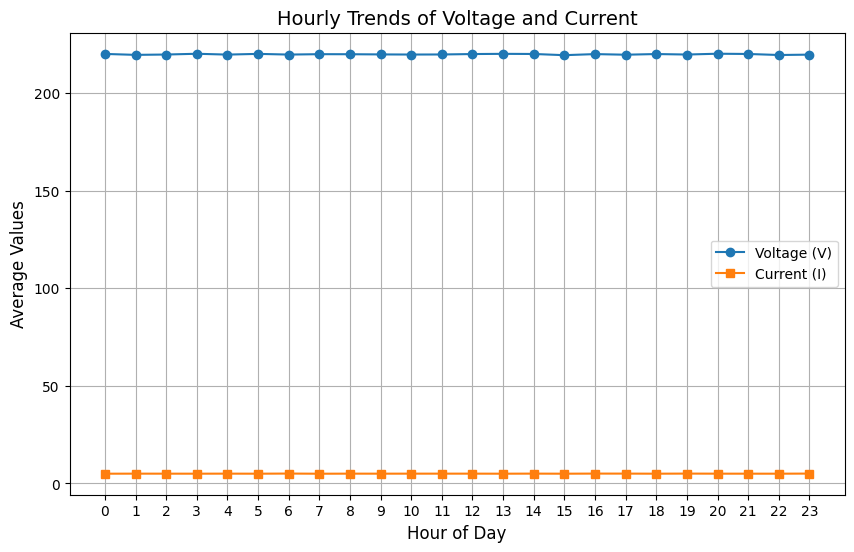

In [140]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour

# Step 2: Group by hour and compute averages
hourly_data = df.groupby('Hour')[['Voltage (V)', 'Current (I)']].mean().reset_index()

# Step 3: Visualize hourly trends
plt.figure(figsize=(10, 6))

# Plot Voltage
plt.plot(hourly_data['Hour'], hourly_data['Voltage (V)'], label='Voltage (V)', marker='o')
# Plot Current
plt.plot(hourly_data['Hour'], hourly_data['Current (I)'], label='Current (I)', marker='s')

plt.title('Hourly Trends of Voltage and Current', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Values', fontsize=12)
plt.xticks(hourly_data['Hour'])
plt.legend()
plt.grid(True)
plt.show()

9. Categorising Humidity in bins

In [141]:
# Step 1: Categorize 'Humidity (%)' into bins
bins = [30, 50, 60, 70]  # Define bin edges
labels = ['Low', 'Medium', 'High']  # Define category labels
df['Humidity_Category'] = pd.cut(df['Humidity (%)'], bins=bins, labels=labels, right=False)

# Step 2: Encode categories numerically
df['Humidity_Enc'] = pd.Categorical(df['Humidity_Category']).codes

# Output results
print(df)

               Timestamp  Voltage (V)  Current (I)    Power (W)  Power_Factor  \
0    2024-12-01 00:00:00   222.483571     4.642510   965.023943      0.880626   
1    2024-12-01 00:01:00   219.308678     4.206038   894.158159      0.939144   
2    2024-12-01 00:02:00   223.238443     4.143615  1102.598216      0.864156   
3    2024-12-01 00:03:00   227.615149     4.188552  1006.917263      0.926711   
4    2024-12-01 00:04:00   219.992912     5.165739  1081.262142      0.931754   
...                  ...          ...          ...          ...           ...   
9995 2024-12-07 22:35:00   226.505510     5.365876  1186.219693      0.858940   
9996 2024-12-07 22:36:00   219.992912     5.699823  1219.255942      0.890498   
9997 2024-12-07 22:37:00   216.473416     4.431447   992.233503      0.974504   
9998 2024-12-07 22:38:00   222.478828     5.507653  1260.912502      0.883132   
9999 2024-12-07 22:39:00   223.221942     5.014070  1379.821738      0.989435   

      Temperature (°C)  Hum

In [142]:
#creating new cleaned and preprocessed csv file
df.to_csv("new_cleaned.csv", index=False)